In [1]:
# HIDDEN
from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from itertools import product

## Equality ##

We know what it means for two numbers to be equal: they are at the same spot on the number line. Equality of random variables, however, can be of more than one kind.

### Equal ###
Two random variables $X$ and $Y$ defined on the same outcome space are *equal* if their values are the same for every outcome in the space. The notation is $X = Y$ and it means that

$$
X(\omega) = Y(\omega) \text{ for all } \omega \in \Omega
$$

This is the usual definition of the equality of two mathematical functions. Informally, it says that when $X$ has the value $10$ then $Y$ must be $10$ too; when $X$ is $11$, $Y$ must be $11$; and so on.

An example will make this clear. Let $N_H$ be the number of heads in three tosses of a coin, and let $N_T$ be the number of tails in the same three tosses. 

Now consider the new random variable $M = 3 - N_T$. The two random variables $N_H$ and $M$ are equal. For every possible outcome of the three tosses, the value of $N_H$ is equal to the value of $M$.

We write this simply as $N_H = M$. Equivalently, $N_H = 3 - N_T$.

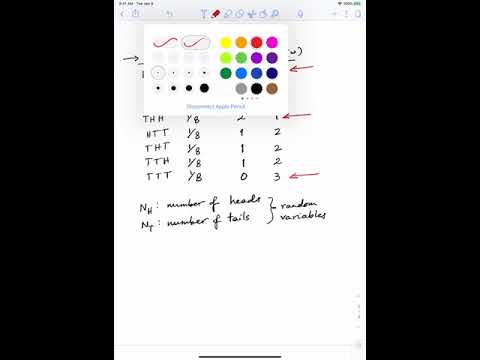

In [2]:
# VIDEO: Two Kinds of Equality
from IPython.display import YouTubeVideo

YouTubeVideo("Z-_RSmBktHM")

### Equal in Distribution ###
$N_H$ and $N_T$, as defined above, are not equal. For example,

$$
N_H(\text{TTT}) = 0 ~~~ \text{but} ~~~ N_T(\text{TTT}) = 3
$$ 

However, there is a sense in which the number of heads "behaves in the same way" as the number of tails. The two random variables have the same probability distribution.

The outcome space is `three_tosses`:

In [3]:
coin = make_array('H', 'T')
three_tosses = list(product(coin, repeat=3))
three_tosses

[('H', 'H', 'H'),
 ('H', 'H', 'T'),
 ('H', 'T', 'H'),
 ('H', 'T', 'T'),
 ('T', 'H', 'H'),
 ('T', 'H', 'T'),
 ('T', 'T', 'H'),
 ('T', 'T', 'T')]

There are only eight outcomes, so it is easy to inspect the table and write the distributions of $N_H$ and $N_T$. Both take the values $0, 1, 2, 3$ with probabilities $1/8, 3/8, 3/8, 1/8$ respectively. This distribution is shown in the table below.

In [4]:
dist = Table().values(np.arange(4)).probabilities(make_array(1, 3, 3, 1)/8)
dist

Value,Probability
0,0.125
1,0.375
2,0.375
3,0.125


We say that $N_H$ and $N_T$ are *equal in distribution*. 

In general, two random variables $X$ and $Y$ are equal in distribution if they have the same probability distribution. 

That is, they have the same set of possible values and the same probabilities for all those values. 

Equality in distribution is denoted as

$$
X \stackrel{d}{=} Y
$$

### Relation between the Equalities ###
Equality is stronger than equality in distribution. If two random variables are the same, outcome by outcome, then they must have the same distribution because they are the same function on the outcome space. 

That is, for any two random variables $X$ and $Y$,

$$
X = Y \implies X \stackrel{d}{=} Y
$$

But as the example of heads and tails in three tosses shows, the converse need not be true.

```{admonition} Quick Check
The random variables below are defined on the probability space consisting of 16 equally likely outcomes of 4 tosses of a coin: $HHHH, HHHT, HHTH$, and so on.

$X$: number of heads in the first two tosses

$Y$: number of heads in the last two tosses

$Z$: number of tails in the last two tosses

For each of the following pairs, fill in the blank with $=$ or $\stackrel{d}{=}$, picking the stronger one if both are applicable. If neither of the symbols applies, explain why not.

(i) $X ~~ \underline{~~~~~~~~~~~~~} ~~ Y$

(ii) $Y ~~ \underline{~~~~~~~~~~~~~} ~~ Z$

(iii) $X ~~ \underline{~~~~~~~~~~~~~} ~~ Z$

(iv) $Y ~~ \underline{~~~~~~~~~~~~~} ~~ 2-Z$

(v) $X ~~ \underline{~~~~~~~~~~~~~} ~~ 2-Z$

```

```{admonition} Answer
:class: dropdown

Fill (i), (ii), (iii), and (v) with $\stackrel{d}{=} $ and (iv) with $=$.

```

### Example: Two Cards Dealt from a Small Deck ###
A deck contains 10 cards, labeled 1, 2, 2, 3, 3, 3, 4, 4, 4, 4. Two cards are dealt at random without replacement. Let $X_1$ be the label on the first card and $X_2$ be the label on the second card.

**Question 1:** Are $X_1$ and $X_2$ equal?

**Answer 1:** No, because for example the outcome could be $(3,1)$ in which case $X_1 = 3$ and $X_2 = 1$.

**Question 2:** Are $X_1$ and $X_2$ equal in distribution?

**Answer 2:** Let's find the two distributions and compare. Clearly the possible values are 1, 2, 3, and 4 in each case. The distribution of $X_1$ is easy: 

$$
P(X_1 = i ) = \frac{i}{10} , ~~ i = 1, 2, 3, 4
$$

When a distribution is defined by a formula like this, you can define a function that does what the formula says:

In [5]:
def prob1(i):
    return i/10

You can create a probability distribution object for $X_1$ using `values` as before but now with the `probability_function` method.

The argument to `probability_function` is the name of the function that takes $i$ as its argument and returns $P(X_1 = i)$.

In [6]:
possible_i = np.arange(1, 5, 1)
dist_X1 = Table().values(possible_i).probability_function(prob1)
dist_X1

Value,Probability
1,0.1
2,0.2
3,0.3
4,0.4


Convince yourself that the function `prob2` below returns $P(X_2 = i)$ for each $i$. The event has been partitioned according to the value of $X_1$.

In [7]:
def prob2(i):
    if i == 1:
        return (9/10)*(1/9)
    else:
        return (i/10)*((i-1)/9) + ((10-i)/10)*(i/9)

In [8]:
dist_X2 = Table().values(possible_i).probability_function(prob2)
dist_X2

Value,Probability
1,0.1
2,0.2
3,0.3
4,0.4


The two distributions are the same! Here is yet another example of symmetry in sampling without replacement. The conclusion is

$$
X_1 \stackrel{d}{=} X_2
$$

```{admonition} Quick Check
$X_1$ and $X_2$ are the results of the first and second of two draws made at random without replacement from the 10 digits $0, 1, 2, 3, 4, 5, 6, 7, 8, 9$. True or false:

(i) $X_1$ has the uniform distribution on the 10 digits.

(ii) $X_2$ has the uniform distribution on the 10 digits.

```

```{admonition} Answer
:class: dropdown
Both are true. For (ii), calculate $P(X_2 = 0)$ as an example to see what's going on.

```